# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who:
   - have a **low total_claim_amount** (e.g., below $1,000),
   - have a response "Yes" to the last marketing campaign.

In [2]:
import pandas as pd

# Load the dataset
url_customer_analysis = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv"
data_customer = pd.read_csv(url_customer_analysis)

# 1. Inspect the first few rows and column names
print("Columns in dataset:")
print(data_customer.columns.tolist())
print("-" * 60)
print(data_customer.head())

# 2. Filter customers with low total claim amount (< 1000)
# and response "Yes" to the last marketing campaign
filtered_customers = data_customer[
    (data_customer['Total Claim Amount'] < 1000) &
    (data_customer['Response'] == 'Yes')
]

# 3. Display summary of the filtered data
print("\nFiltered DataFrame (customers with Total Claim Amount < 1000 and Response = 'Yes'):")
print(filtered_customers.head())

# 4. Check how many customers match this criteria
print("\nNumber of customers meeting the criteria:", len(filtered_customers))

# 5. Optional: save to CSV for further analysis
filtered_customers.to_csv("filtered_customers_low_claim_yes_response.csv", index=False)
print("\nFiltered dataset saved as 'filtered_customers_low_claim_yes_response.csv'")

Columns in dataset:
['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size', 'Vehicle Type']
------------------------------------------------------------
   Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0           0  DK49336     Arizona              4809.216960       No   
1           1  KX64629  California              2228.525238       No   
2           2  LZ68649  Washington             14947.917300       No   
3           3  XL78013      Oregon             22332.439460      Yes   
4           4  QA50777      Oregon              9025.067525       No   

   Coverage Education 

2. Using the original Dataframe, analyze:
   - the average `monthly_premium` and/or customer lifetime value by `policy_type` and `gender` for customers who responded "Yes", and
   - compare these insights to `total_claim_amount` patterns, and discuss which segments appear most profitable or low-risk for the company.

In [3]:
# 1. Filter customers who responded "Yes"
responded_yes = data_customer[data_customer['Response'] == 'Yes']

# 2. Create pivot tables for analysis

# Average Monthly Premium by Policy Type and Gender
avg_monthly_premium = pd.pivot_table(
    responded_yes,
    values='Monthly Premium Auto',
    index='Policy Type',
    columns='Gender',
    aggfunc='mean'
).round(2)

# Average Customer Lifetime Value by Policy Type and Gender
avg_clv = pd.pivot_table(
    responded_yes,
    values='Customer Lifetime Value',
    index='Policy Type',
    columns='Gender',
    aggfunc='mean'
).round(2)

# Average Total Claim Amount by Policy Type and Gender
avg_claim = pd.pivot_table(
    responded_yes,
    values='Total Claim Amount',
    index='Policy Type',
    columns='Gender',
    aggfunc='mean'
).round(2)

# 3. Display results
print("Average Monthly Premium by Policy Type and Gender:")
print(avg_monthly_premium)
print("-" * 70)

print("Average Customer Lifetime Value by Policy Type and Gender:")
print(avg_clv)
print("-" * 70)

print("Average Total Claim Amount by Policy Type and Gender:")
print(avg_claim)
print("-" * 70)

# 4. Draw Insights
print("Insights:")
print("""
1. Compare average CLV (long-term profitability) against average claim amounts (risk).
2. High CLV + low claim amount = most profitable and low-risk customers.
3. Check if certain policy types (e.g., Personal Auto or Corporate Auto) consistently show high premiums.
4. Observe gender trends to understand which demographic brings better returns.
""")

Average Monthly Premium by Policy Type and Gender:
Gender              F      M
Policy Type                 
Corporate Auto  94.30  92.19
Personal Auto   99.00  91.09
Special Auto    92.31  86.34
----------------------------------------------------------------------
Average Customer Lifetime Value by Policy Type and Gender:
Gender                F        M
Policy Type                     
Corporate Auto  7712.63  7944.47
Personal Auto   8339.79  7448.38
Special Auto    7691.58  8247.09
----------------------------------------------------------------------
Average Total Claim Amount by Policy Type and Gender:
Gender               F       M
Policy Type                   
Corporate Auto  433.74  408.58
Personal Auto   452.97  457.01
Special Auto    453.28  429.53
----------------------------------------------------------------------
Insights:

1. Compare average CLV (long-term profitability) against average claim amounts (risk).
2. High CLV + low claim amount = most profitable and low-ris

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

Total Number of Customers per State (only states with more than 500 customers):
        State  Total_Customers
1  California             3552
3      Oregon             2909
0     Arizona             1937
2      Nevada              993
4  Washington              888


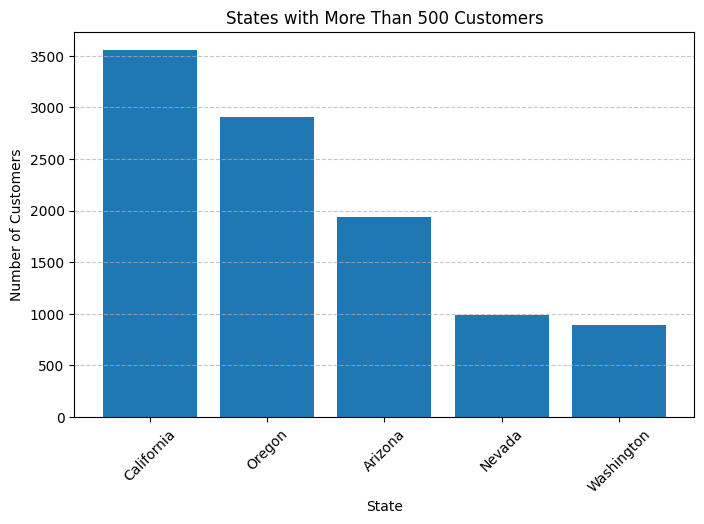

In [4]:
# 1. Group by State and count the number of customers
customers_per_state = data_customer.groupby('State')['Customer'].count().reset_index()

# 2. Rename columns for clarity
customers_per_state.columns = ['State', 'Total_Customers']

# 3. Filter to include only states with more than 500 customers
states_over_500 = customers_per_state[customers_per_state['Total_Customers'] > 500]

# 4. Sort the results by number of customers (descending)
states_over_500 = states_over_500.sort_values(by='Total_Customers', ascending=False)

# 5. Display results
print("Total Number of Customers per State (only states with more than 500 customers):")
print(states_over_500)

# Optional: visualize results with a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(states_over_500['State'], states_over_500['Total_Customers'])
plt.title('States with More Than 500 Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [5]:
# 1. Group by education level and gender, then compute max, min, and median CLV
clv_stats = data_customer.groupby(['Education', 'Gender'])['Customer Lifetime Value'].agg(['max', 'min', 'median']).reset_index()

# 2. Round numeric values for readability
clv_stats[['max', 'min', 'median']] = clv_stats[['max', 'min', 'median']].round(2)

# 3. Display the result
print("Maximum, Minimum, and Median Customer Lifetime Value by Education Level and Gender:")
print(clv_stats)

# 4. Insights
print("\nConclusions:")
print("""
1. This analysis highlights income or spending potential differences based on education and gender.
2. Higher education levels (Bachelor, Master, Doctor) usually show higher median and maximum CLV, 
   reflecting better long-term profitability potential.
3. If one gender consistently shows higher CLV within the same education group, 
   it could indicate different purchasing behaviors or product preferences.
4. Marketing can be tailored — for example, more premium offers for high-CLV groups.
""")

Maximum, Minimum, and Median Customer Lifetime Value by Education Level and Gender:
              Education Gender       max      min   median
0              Bachelor      F  73225.96  1904.00  5640.51
1              Bachelor      M  67907.27  1898.01  5548.03
2               College      F  61850.19  1898.68  5623.61
3               College      M  61134.68  1918.12  6005.85
4                Doctor      F  44856.11  2395.57  5332.46
5                Doctor      M  32677.34  2267.60  5577.67
6  High School or Below      F  55277.45  2144.92  6039.55
7  High School or Below      M  83325.38  1940.98  6286.73
8                Master      F  51016.07  2417.78  5729.86
9                Master      M  50568.26  2272.31  5579.10

Conclusions:

1. This analysis highlights income or spending potential differences based on education and gender.
2. Higher education levels (Bachelor, Master, Doctor) usually show higher median and maximum CLV, 
   reflecting better long-term profitability potentia

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [ ]:
# your code goes here